<div style="text-align: right">INFO 6105 Data Sci Engineering Methods and Tools, Lecture 2 Day 2</div>
<div style="text-align: right">Prof. Dino Konstantopoulos, 15 January 2020</div>

# Data Wrangling with Pandas and a *practical* introduction to statistics


<br />
<center>
<img src="images/kungfu-panda.png" width=600 />
</center>

`pandas` is a Python package providing fast, flexible, and expressive data structures designed to work with relational or labeled (hierarchical) data or both. It is a fundamental high-level building block for doing practical, real world, **scientific data analysis** in Python.

![Protein Strucure with Sugar](images/LysozymeRock.gif)

`pandas` is well suited for:

- Tabular data with heterogeneously-typed columns, as in an SQL table or Excel spreadsheet

- Ordered and unordered (not necessarily fixed-frequency) *time series* (1D) data

- Arbitrary *matrix* (2 and higher D) data (homogeneously typed or heterogeneous) with row and column labels

- Any other form of observational / statistical data sets. The data actually need not be labeled at all to be placed into a pandas data structure

Key features are:

- Shape mutability: columns can be inserted and deleted from DataFrame and higher dimensional objects

- Automatic and explicit data alignment: objects can be explicitly aligned to a set of labels, or the data can be aligned automatically

- Intuitive merging and joining of data sets

- Flexible reshaping and pivoting of data sets

- Robust IO tools for loading data from flat files, Excel files, databases, HDF5, etc.

- Build-in statistics and linear regressions, extensible with additional packages (e.g. statsmodels)

After this lecture, chances are you will never use Excel functions to analyze data anymore, and instead you will import your excel spreadsheet into a notebook and use pandas & friends for your data analysis :-) (sometimes you might use RStudio).

We'll do some simple statistics in this notebook. Do not be afraid if the statistics are not familiar to you, we will do a much better introduction to statistics *next week*. This notebook is to introduce `pandas`.

The most important data structures in `pandas` are 1D **Series** (vectors) and 2D **dataframes** (matrices).

# 1. Introduction to pandas *Series*

`pandas` Series are **vectors**!

In [3]:
#Series Lab
import pandas as pd

In [4]:
obj = pd.Series([10,20,30,40,50])
obj

0    10
1    20
2    30
3    40
4    50
dtype: int64

Do you see how the series automatically gets its own index?

In [5]:
obj.values

array([10, 20, 30, 40, 50])

In [6]:
obj.index

RangeIndex(start=0, stop=5, step=1)

We can also specify an index that we pick:

In [7]:
obj = pd.Series([10,20,30,40,50], index = ['a', 'b', 'c', 'd', 'e'])
obj

a    10
b    20
c    30
d    40
e    50
dtype: int64

We can query data with predicates as index:

In [8]:
obj[obj > 20]

c    30
d    40
e    50
dtype: int64

We can analyze NBA games, too:

In [9]:
nba = {'Celtics': 3, "Warriors": 4}
data = pd.Series(nba)
data

Celtics     3
Warriors    4
dtype: int64

Hmm.. I think we need more than one dimension to analyze the NBA. Once we increase the number of dimensions, we move on pandas' `DataFrame`:

# 2. Introduction to pandas *DataFrames*

`pandas` dataframes are excel spreadsheets, also known mathematically as **matrices**!

Let's import data as a dictionary structure:

In [10]:
nba = {"east": ['Celtics', "Cavs", "76ers"], "west": ["Warriors", "Lakers", "Chicago"]}
nbadf = pd.DataFrame(nba)
nbadf

,east,west
0,Celtics,Warriors
1,Cavs,Lakers
2,76ers,Chicago


In [11]:
# But.. does this work?
nba = {"east": ['Celtics', "Cavs"], "west": ["Warriors", "Lakers", "Chicago"]}
nbadf = pd.DataFrame(nba)
nbadf


ValueError: arrays must all be same length

Oh no! What to do?

In [12]:
# ..so do this instead, and pandas adds 'None' or 'NaN' where data's missing
nbadf = pd.DataFrame.from_dict(nba, orient='index')
nbadf

,0,1,2
east,Celtics,Cavs,None
west,Warriors,Lakers,Chicago


To get the `east` row:

In [13]:
nbadf.loc['east']

0    Celtics
1       Cavs
2       None
Name: east, dtype: object

To get the first column:

In [14]:
nbadf.ix[:, 0]

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


east     Celtics
west    Warriors
Name: 0, dtype: object

If we add dictionaries as the data itself, this gives pandas the opportunity to add specified indexes as rows and columns:

In [15]:
nba2 = {"east": {'MA': 'Celtics', 'IN': "Cavs"}, "west": {"CA": "Warriors", "CAS": "Lakers", "IL": "Chicago"}}
nbadf = pd.DataFrame(nba2)
nbadf

,east,west
MA,Celtics,NaN
IN,Cavs,NaN
CA,NaN,Warriors
CAS,NaN,Lakers
IL,NaN,Chicago


In [16]:
nbadf.T

,MA,IN,CA,CAS,IL
east,Celtics,Cavs,NaN,NaN,NaN
west,NaN,NaN,Warriors,Lakers,Chicago


In [17]:
nbadf.columns

Index(['east', 'west'], dtype='object')

In [18]:
nbadf.index

Index(['MA', 'IN', 'CA', 'CAS', 'IL'], dtype='object')

Let's reindex:

In [19]:
obj2 = nbadf.reindex(['MA', 'IN', 'IL', 'CA', 'CAS'])
obj2

,east,west
MA,Celtics,NaN
IN,Cavs,NaN
IL,NaN,Chicago
CA,NaN,Warriors
CAS,NaN,Lakers


Can we work with data independently of indexes? Yes, using **numpy matrices**!

Let's use python's `arange` to create a range of numbers, and `reshape` to shape the dimensions of our dataset:

In [20]:
import numpy as np
nba3 = np.arange(0,9).reshape(3,3)
nba3

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

And let's attach the data to rows and columns to give it a context!

In [21]:
nbadf3 = pd.DataFrame(nba3, index=['MA', 'NY', 'TX'], columns=['Celtics', 'Knicks', 'Rockets'])
nbadf3

,Celtics,Knicks,Rockets
MA,0,1,2
NY,3,4,5
TX,6,7,8


In [22]:
# this looks.. fake. Let's use random number generator in matrix to make the data look more real!
nbadf3 = pd.DataFrame(np.random.randn(3,3), index=['MA', 'NY', 'TX'], columns=['Celtics', 'Knicks', 'Rockets'])
nbadf3

,Celtics,Knicks,Rockets
MA,-0.058280,-0.497645,-0.754667
NY,-0.970459,-0.737582,-0.235275
TX,0.871813,-1.016663,-0.681051


How do we apply math formulas to the data like we do it in excel?

In [23]:
# formula as lambda
f = lambda x: x - x.mean()
nbadf3.apply(f)

,Celtics,Knicks,Rockets
MA,-0.005972,0.252985,-0.197669
NY,-0.918151,0.013048,0.321723
TX,0.924122,-0.266033,-0.124054


In [24]:
nbadf3.apply(f, axis = 'columns')

,Celtics,Knicks,Rockets
MA,0.378584,-0.060781,-0.317803
NY,-0.322687,-0.089810,0.412497
TX,1.147114,-0.741363,-0.405751


# 3. Finance with pandas

Finance is cool. You can do all your financial strategizing from within a notebook with the help of pandas! I cannot *not show* you how to do this! Finance is the perfect application for `pandas` (time) **Series**.

Let's install a package to read financial data.

Always try `conda install` first:

In [25]:
# better do this in an anaconda terminal on windows or bash shell on mac
!conda install pandas_datareader

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - pandas_datareader

Current channels:

  - https://repo.anaconda.com/pkgs/main/osx-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/osx-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




If that does not work, try `pip install`:

In [26]:
# better do this in an anaconda terminal on windows or bash shell on mac
!pip install pandas_datareader

     |████████████████████████████████| 8.8MB 9.0MB/s eta 0:00:01


Now, let's *use* the package:

In [27]:
#from pandas_datareader import data, wb
import pandas as pd
# the line below is the fix for is_list_like lub
pd.core.common.is_list_like = pd.api.types.is_list_like

import pandas_datareader as web
import datetime
start = datetime.datetime(2016, 1, 1)
end = datetime.datetime(2019, 1, 30)
aapl = web.DataReader('T', 'yahoo', start, end)
aapl.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,34.349998,34.000000,34.080002,34.349998,31779500.0,27.287683
2016-01-05,34.689999,34.119999,34.349998,34.590000,30707300.0,27.478342
2016-01-06,34.209999,33.720001,33.820000,34.060001,26911800.0,27.438065
2016-01-07,34.099998,33.509998,33.619999,33.509998,35111400.0,26.994995
2016-01-08,33.959999,33.410000,33.770000,33.540001,28090800.0,27.019161
2016-01-11,34.099998,33.529999,33.759998,33.950001,26438800.0,27.349447
2016-01-12,34.189999,33.660000,34.099998,33.900002,24124100.0,27.309170
2016-01-13,34.299999,33.730000,34.009998,33.740002,40241300.0,27.180277
2016-01-14,34.549999,33.750000,33.880001,34.299999,36327400.0,27.631405


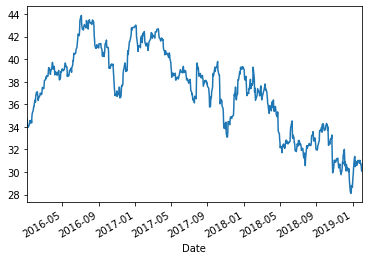

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
vol = aapl['High']
vol.plot()

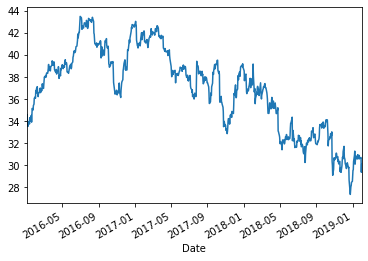

In [29]:
close = aapl['Close']
close.plot()

We can calculate the n-th (n=1 is the default) discrete difference along a given axis to find out about gains/losses, using numpy's [diff](https://docs.scipy.org/doc/numpy/reference/generated/numpy.diff.html) API:

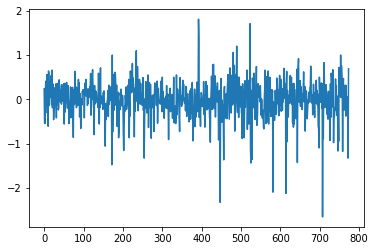

In [30]:
import numpy as np
returns = np.diff(close)
plt.plot(returns)

You can take the logarithm to squash big growths. In this case, does not make a big difference:

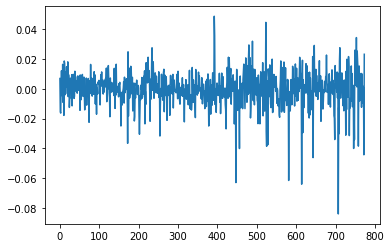

In [31]:
import numpy as np
returns = np.diff(np.log(close))
plt.plot(returns)

In [32]:
vol.corr(close)
# a value of 0.3 essentially means little correlation..

0.997827467354841

Wow, I can analyze the stock market with pandas, numpy, and matplotlib!

Yes, for free! Or you can pay lots of money to Fidelity Investments, who will turn to their programmers to give you the same tools you can use in a python notebook!

### Time Series Exploratory Data Analysis (EDA)

A time series is simply a series of data points ordered in time. In a time series, time is often the independent variable and the goal is usually to make a **forecast** for the future.

However, there are other aspects that come into play when dealing with time series. Namely:
- Is it **stationary**? Stationarity is an important characteristic of time series. A time series is said to be
stationary if its statistical properties do not change over time. In other words, it has
constant mean and variance, and covariance is independent of time. We'll study what these concepts represent when we get into statistics. For now just think of them as point estimates of a distribution of numbers. Often, stock prices are ***not a stationary process***, since we might see a growing trend, or
its volatility might increase over time (meaning that variance is changing). Ideally, we want to have a stationary time series for modelling. Of course, not all of them are stationary, but we can often make different transformations to make them stationary. [Dickey-Fuller](https://en.wikipedia.org/wiki/Dickey%E2%80%93Fuller_test) is the statistical test
that we run to determine if a time series is stationary or not. If you Coop for Wall Street or get a job as quant, you'll be running this test *all the time*.


- Is the target variable **autocorrelated**? Autocorrelation is the similarity between observations as a function of the
time lag between them


- Is there a **seasonality**? Seasonality refers to periodic fluctuations. For example, electricity consumption is high
during the day and low during night, or online sales increase during Christmas before slowing down again. seasonality can also be derived from an autocorrelation plot if it has a
sinusoidal shape. Simply look at the period, and it gives the length of the season

First, we import libraries that will be helpful throughout our analysis. 

Then, we import a dataset.

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

data = pd.read_csv('data/stock_prices_sample.csv', index_col=['DATE'], parse_dates=['DATE'])
data.head(10)

,TICKER,FIGI,TYPE,FREQUENCY,OPEN,HIGH,LOW,CLOSE,VOLUME,ADJ_OPEN,ADJ_HIGH,ADJ_LOW,ADJ_CLOSE,ADJ_VOLUME,ADJ_FACTOR,EX_DIVIDEND,SPLIT_RATIO
DATE,,,,,,,,,,,,,,,,,
2013-01-04,GEF,BBG000BLFQH8,EOD,daily,46.31,47.6198,46.2300,47.3700,248000.0,38.517220,39.606614,38.450681,39.398849,248000.0,NaN,0.0,1.0
2013-01-03,GEF,BBG000BLFQH8,EOD,daily,46.43,46.5200,46.1400,46.4800,131300.0,38.617027,38.691882,38.375826,38.658613,131300.0,NaN,0.0,1.0
2013-01-02,GEF,BBG000BLFQH8,EOD,daily,45.38,46.5400,45.1600,46.4100,184900.0,37.743715,38.708516,37.560735,38.600392,184900.0,NaN,0.0,1.0
2018-06-05,GF,BBG000C3C6S2,Intraday,daily,18.86,18.9100,18.8700,18.8700,10000.0,18.860000,18.910000,18.870000,18.870000,10000.0,NaN,0.0,1.0
2018-06-04,GF,BBG000C3C6S2,EOD,daily,18.86,18.8900,18.7900,18.8100,39095.0,18.860000,18.890000,18.790000,18.810000,39095.0,NaN,0.0,1.0
2018-06-01,GF,BBG000C3C6S2,EOD,daily,18.58,18.7600,18.5800,18.7400,17468.0,18.580000,18.760000,18.580000,18.740000,17468.0,NaN,0.0,1.0
2018-05-31,GF,BBG000C3C6S2,EOD,daily,18.52,18.5200,18.3012,18.4900,22384.0,18.520000,18.520000,18.301200,18.490000,22384.0,NaN,0.0,1.0
2018-05-30,GF,BBG000C3C6S2,EOD,daily,18.47,18.6780,18.4700,18.6500,22633.0,18.470000,18.678000,18.470000,18.650000,22633.0,NaN,0.0,1.0
2018-05-29,GF,BBG000C3C6S2,EOD,daily,18.51,18.5100,18.1500,18.2562,67412.0,18.510000,18.510000,18.150000,18.256200,67412.0,NaN,0.0,1.0


Assume we only want end of day (EOD) information, and no `GEF` or `Intraday` tickers.

So let's clean the data:

In [34]:
data = data[data.TICKER != 'GEF']
data = data[data.TYPE != 'Intraday']
drop_cols = ['SPLIT_RATIO', 'EX_DIVIDEND', 'ADJ_FACTOR', 'ADJ_VOLUME', 'ADJ_CLOSE', 'ADJ_LOW', 
             'ADJ_HIGH', 'ADJ_OPEN', 'VOLUME', 'FREQUENCY', 'TYPE', 'FIGI']

data.drop(drop_cols, axis=1, inplace=True)
data.head()

,TICKER,OPEN,HIGH,LOW,CLOSE
DATE,,,,,
2018-06-04,GF,18.86,18.890,18.7900,18.8100
2018-06-01,GF,18.58,18.760,18.5800,18.7400
2018-05-31,GF,18.52,18.520,18.3012,18.4900
2018-05-30,GF,18.47,18.678,18.4700,18.6500
2018-05-29,GF,18.51,18.510,18.1500,18.2562


Let's plot the closing price:

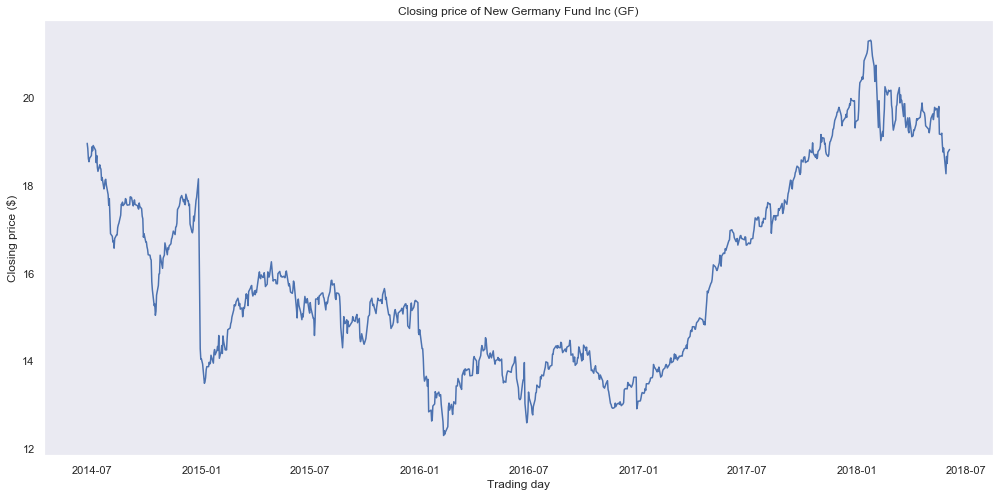

In [35]:
# Plot closing price

plt.figure(figsize=(17, 8))
plt.plot(data.CLOSE)
plt.title('Closing price of New Germany Fund Inc (GF)')
plt.ylabel('Closing price ($)')
plt.xlabel('Trading day')
plt.grid(False)
plt.show()

Clearly, you see that this is not a stationary process, and it is hard to tell if there is some
kind of seasonality.

### Moving average
The moving average model is probably the most naive approach to time series
modelling. This model simply states that the next observation is the mean of all past
observations.

Although simple, this model might be surprisingly good and it represents a good starting
point. 

Otherwise, the moving average can be used to identify interesting trends in the data. We
can define a window to apply the moving average model to smooth the time series, and
highlight different trends.

Let’s use the moving average model to smooth our time series. For that, we will use a
helper function that will run the moving average model on a specified time window and
it will plot the result smoothed curve:

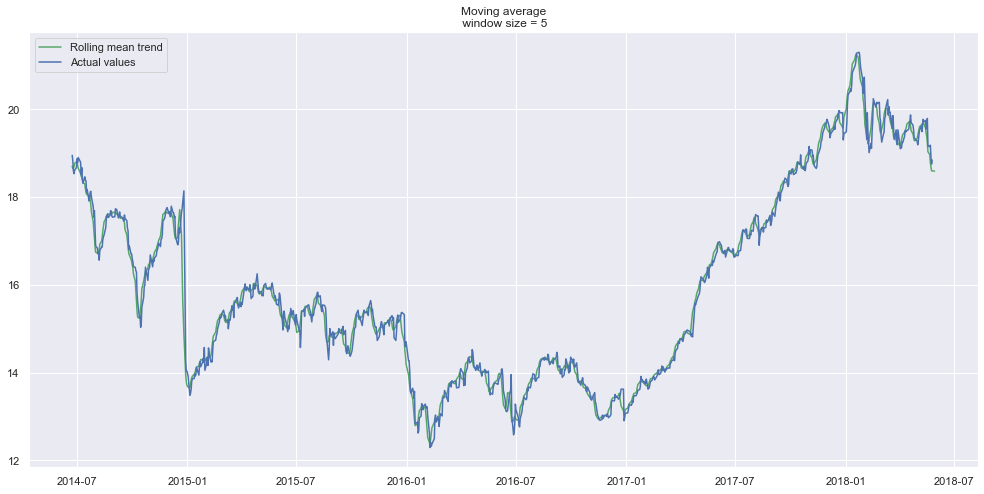

In [36]:
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):
    rolling_mean = series.rolling(window=window).mean()
 
    plt.figure(figsize=(17,8))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Rolling mean trend')

    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')

    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)

#Smooth by the previous 5 days (by week)
plot_moving_average(data.CLOSE, 5)

#Smooth by the previous month (30 days)
#plot_moving_average(data.CLOSE, 30)

#Smooth by previous quarter (90 days)
#plot_moving_average(data.CLOSE, 90, plot_intervals=True)

As you can see, we can hardly see a trend, because it is too close to actual curve. Let’s see
the result of smoothing by the previous month, and previous quarter:

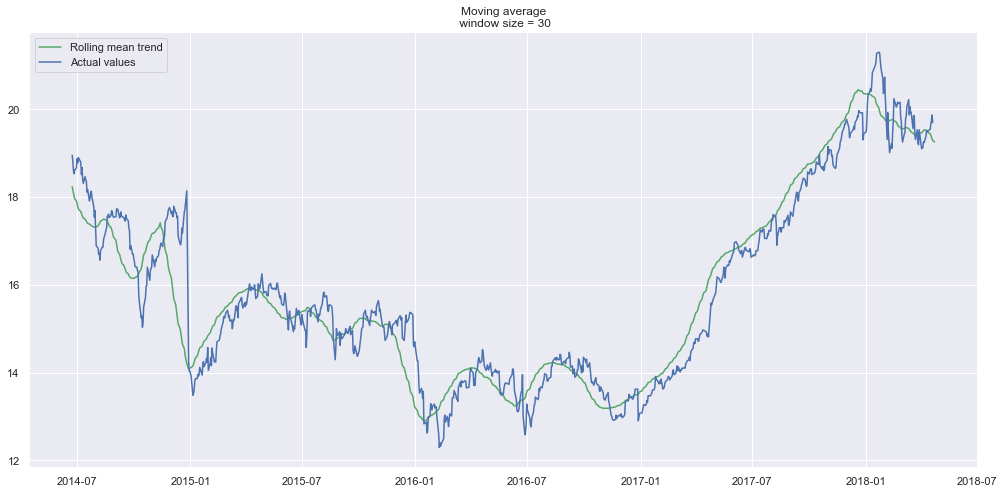

In [37]:
plot_moving_average(data.CLOSE, 30)

NameError: name 'mean_absolute_error' is not defined

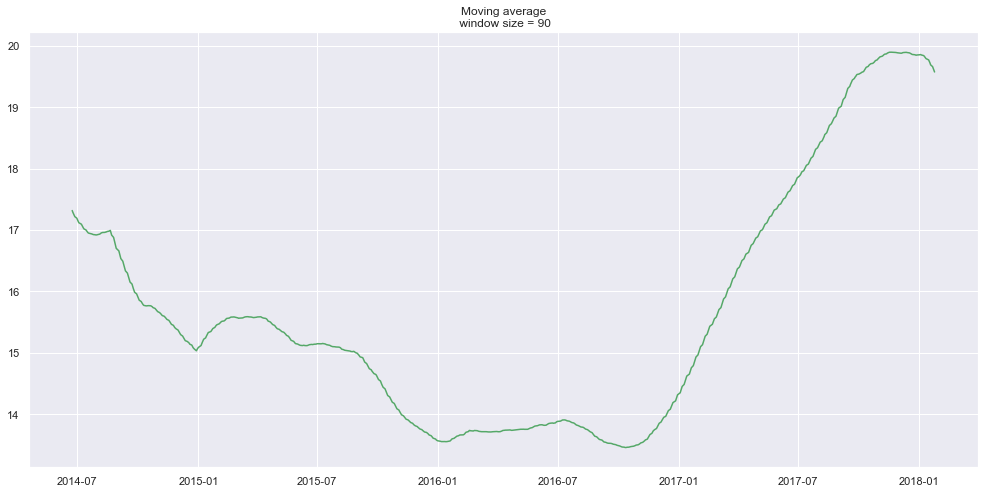

In [38]:
plot_moving_average(data.CLOSE, 90, plot_intervals=True)

Trends are easier to spot now. Notice how the 30-day and 90-day trend show a
downward curve at the end. This might mean that the stock is likely to go down in the
following days.

### Exponential smoothing
**Exponential smoothing** uses a similar logic to moving average, but this time, a different
decreasing weight is assigned to each observations. In other words, less importance is
given to observations as we move further from the present (very old observations become less important).

**Double exponential smoothing** is used when there is a trend in the time series. In that
case, we use this technique, which is simply a recursive use of exponential smoothing
twice.

**Triple exponential smoothing** extends double exponential smoothing, by adding a seasonal smoothing
factor. Of course, this is useful if you notice seasonality in your time series.

<br />
<center>
<img src="ipynb.images/exponential-smoothing.png" width=400 />
</center>

$\alpha$ is a smoothing factor that takes values between 0 and 1. It determines how
fast the weight decreases for previous observations.

$\beta$ is the trend smoothing factor, and it takes values between 0 and 1.

$\gamma$ is the seasonal smoothing factor and L is the length of the season.

Let's do exponential smoothing and use 0.05 and 0.3 as values for the smoothing factor.

In [ ]:
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

def plot_exponential_smoothing(series, alphas):
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
    plt.plot(series.values, "c", label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Exponential Smoothing")
    plt.grid(True);
        
plot_exponential_smoothing(data.CLOSE, [0.05, 0.3])

As you can see, an alpha value of 0.05 smoothed the curve while picking up most of the
upward and downward trends.

In [ ]:
def double_exponential_smoothing(series, alpha, beta):
    result = [series[0]]
    
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # forecasting
            value = result[-1]
        else:
            value = series[n]
        
        last_level, level = level, alpha * value + (1 - alpha) * (level + trend)
        trend = beta * (level - last_level) + (1 - beta) * trend
        result.append(level + trend)
    return result

def plot_double_exponential_smoothing(series, alphas, betas):
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        for beta in betas:
            plt.plot(double_exponential_smoothing(series, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
    plt.plot(series.values, label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Double Exponential Smoothing")
    plt.grid(True)

plot_double_exponential_smoothing(data.CLOSE, alphas=[0.9, 0.02], betas=[0.9, 0.02])

### Modelling

We must turn our series into a **stationary process** in order to
model it. Therefore, let’s apply the Dickey-Fuller test to see if it is a stationary process. The Dickey-Fuller test is a point estimate, when it is tiny (say less than 0.01), we can safely say that the time series is stationary. Otherwise, *not*.

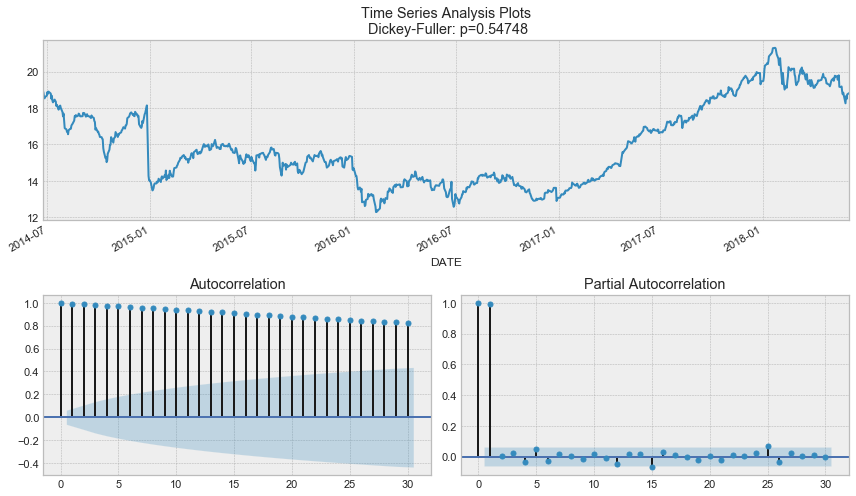

In [42]:
import statsmodels.api as sm
import statsmodels as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
    
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=figsize)
        layout = (2,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1,0))
        pacf_ax = plt.subplot2grid(layout, (1,1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.tsaplots.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.tsaplots.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
        
tsplot(data.CLOSE, lags=30)

By the Dickey-Fuller test, the time series is non-stationary. 

Also, looking at the autocorrelation plot, we see that it is very high, and it seems that there is no clear seasonality.

Therefore, to get rid of the high autocorrelation and to make the process stationary, let’s take the first difference: We simply subtract the time series from itself with a lag of one day, and we get:

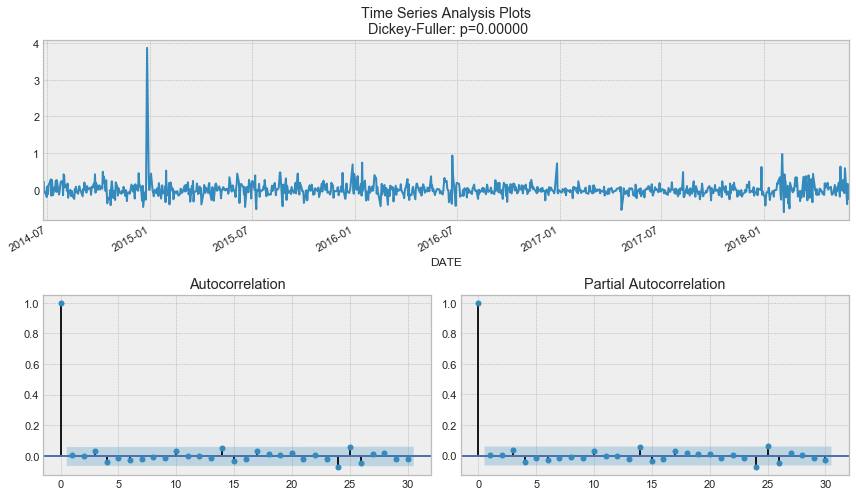

In [43]:
# Take the first difference to remove to make the process stationary
data_diff = data.CLOSE - data.CLOSE.shift(1)

tsplot(data_diff[1:], lags=30)

Our series is now stationary and we can start modelling! Does all this math make you want to work for Wall Street?

<br />
<center>
<img src="ipynb.images/wolf-wall-street.jpg" width=400 />
</center>

### Homework: 
Study the stationarity of **three** stocks from three different industries. Plot closing prices, model them with either simple or double exponential smoothing, and test to see if they're stationary.

# 4. Interactive learning with pandas

If you think  that your python professor really sucks, then you can google for good python videos on youtube, view them in a notebook, and do the computations while the instructor is talking!

Now that's what I call **accelerated learning**! Here are some cool ones on **Python**, mixing *motivation* with *deep content*.

By the way, that is also how scientific papers should be ***written***, with code up on github, active code within the notebook in cells that demonstrate your basic proofs, and detailed experiment setup up on youtube videos, referenced in the paper!

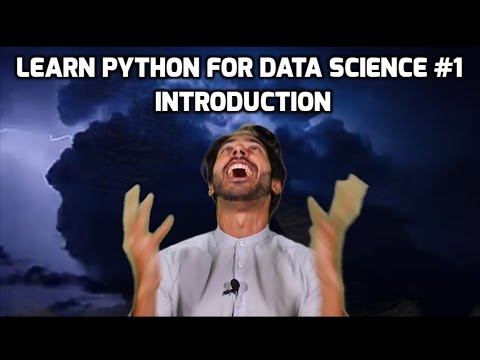

In [40]:
from IPython.display import YouTubeVideo
YouTubeVideo('T5pRlIbr6gg')

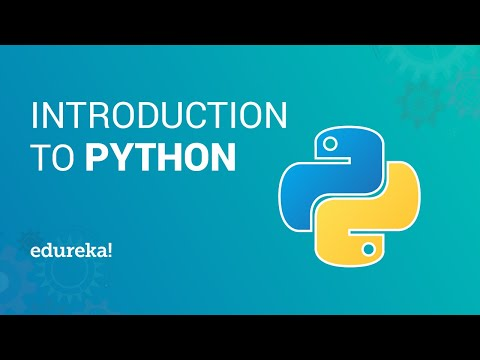

In [41]:
YouTubeVideo('uYjRzbP5aZs')

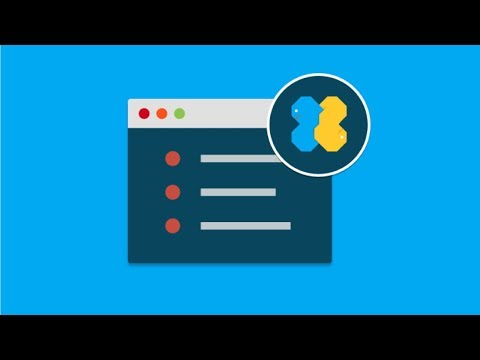

In [42]:
YouTubeVideo('7lmCu8wz8ro')

And here for **pandas**:

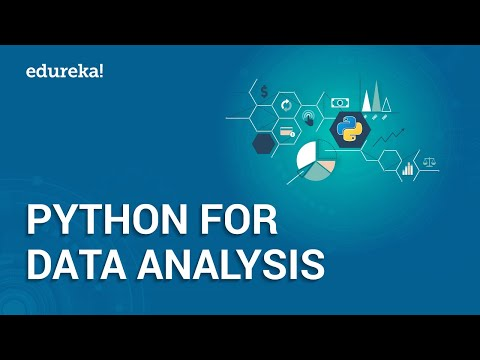

In [43]:
YouTubeVideo('B42n3Pc-N2A')

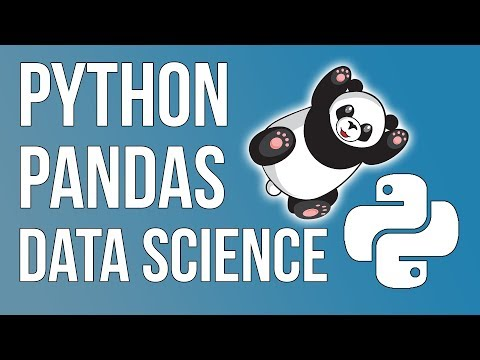

In [44]:
YouTubeVideo('vmEHCJofslg')

And here's one if you like, *like me*, to sing karaoke in chinese (也 你 爱  韩红）:

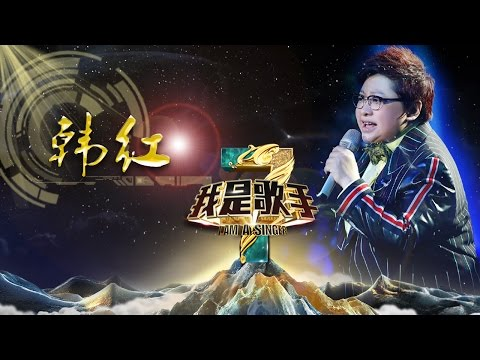

In [45]:
YouTubeVideo('npQSre0yLSI')

 I add all songs I likee in a python notebook, keep the music and notes underneath (even download python DAW programs and run them in my notebook), and I have myself a personal KTV!

# 5. Data aggregation & pivoting with pandas

Here we learn how to project and pivot tabular data with pandas.

Let's load some gaming data and do *very basic* statistical analysis. This should remind you of similar operations with did in out **R** lab.

This is a famous dataset:

In [46]:
df = pd.read_csv('data/pokemon_data.csv')
df.head(10)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,44,48,65,50,64,43,1,False


We reindex by sorting on `Type 1` and `HP`:

In [47]:
df2 = df.sort_values(['Type 1', 'HP'])
df2.head(10)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
316,292,Shedinja,Bug,Ghost,1,90,45,30,30,40,3,False
230,213,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False
462,415,Combee,Bug,Flying,30,30,42,30,42,70,4,False
603,543,Venipede,Bug,Poison,30,45,59,30,39,57,5,False
314,290,Nincada,Bug,Ground,31,45,90,30,30,40,3,False
51,46,Paras,Bug,Grass,35,70,55,45,55,25,1,False
446,401,Kricketot,Bug,NaN,37,25,41,25,41,25,4,False
732,664,Scatterbug,Bug,NaN,38,35,40,27,25,35,6,False
16,13,Weedle,Bug,Poison,40,35,30,20,20,50,1,False
179,165,Ledyba,Bug,Flying,40,20,30,40,80,55,2,False


Let's add a column that is the **sum** of columns `HP` through `Speed`:

In [48]:
df['Total'] = df.iloc[:, 4:10].sum(axis=1)
df.head(10)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,309
5,5,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False,405
6,6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False,534
7,6,CharizardMega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False,634
8,6,CharizardMega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False,634
9,7,Squirtle,Water,NaN,44,48,65,50,64,43,1,False,314


Let's rearrange columns to move our `Total` column (the *last* one) closer to the left:

In [49]:
cols = list(df.columns)
df = df[cols[0:4] + [cols[-1]]+cols[4:12]]
df.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


Wow, better than excel!

In fact, let's save our data as a spreadsheet:

In [50]:
df.to_excel('data/pokemon00.xlsx', index=False)

Let's filter our data for `Type 1` == Grass, `Type 2` == Poison, and `HP` > 70:

In [51]:
df3 = df.loc[(df['Type 1'] == 'Grass') & (df['Type 2'] == 'Poison') & (df['HP'] > 70)]
df3.reset_index(drop=True, inplace=True)
df3

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
1,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
2,45,Vileplume,Grass,Poison,490,75,80,85,110,90,50,1,False
3,71,Victreebel,Grass,Poison,490,80,105,65,100,70,70,1,False
4,591,Amoonguss,Grass,Poison,464,114,85,70,85,80,30,5,False


Let's do aggregate statistics with `pandas`' GROUP_BY:

In [52]:
df4 = df.groupby(['Type 1', 'Type 2']).count()
df4.head(20)

#  Name  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  \
Type 1 Type 2                                                             
Bug    Electric   2     2      2   2       2        2        2        2   
       Fighting   2     2      2   2       2        2        2        2   
       Fire       2     2      2   2       2        2        2        2   
       Flying    14    14     14  14      14       14       14       14   
       Ghost      1     1      1   1       1        1        1        1   
       Grass      6     6      6   6       6        6        6        6   
       Ground     2     2      2   2       2        2        2        2   
       Poison    12    12     12  12      12       12       12       12   
       Rock       3     3      3   3       3        3        3        3   
       Steel      7     7      7   7       7        7        7        7   
       Water      1     1      1   1       1        1        1        1   
Dark   Dragon     3     3      3   3       3        3        3        3   
       Fighting   2     2      2   2       2        2        2        2   
       Fire       3     3      3   3       3        3        3        3   
       Flying     5     5      5   5       5        5        5        5   
       Ghost      2     2      2   2       2        2        2        2   
       Ice        2     2      2   2       2        2        2        2   
       Psychic    2     2      2   2       2        2        2        2   
       Steel      2     2      2   2       2        2        2        2   
Dragon Electric   1     1      1   1       1        1        1        1   

                 Speed  Generation  Legendary  
Type 1 Type 2                                  
Bug    Electric      2           2          2  
       Fighting      2           2          2  
       Fire          2           2          2  
       Flying       14          14         14  
       Ghost         1           1          1  
       Grass         6           6          6  
       Ground        2           2          2  
       Poison       12          12         12  
       Rock          3           3          3  
       Steel         7           7          7  
       Water         1           1          1  
Dark   Dragon        3           3          3  
       Fighting      2           2          2  
       Fire          3           3          3  
       Flying        5           5          5  
       Ghost         2           2          2  
       Ice           2           2          2  
       Psychic       2           2          2  
       Steel         2           2          2  
Dragon Electric      1           1          1

Here we see, for example, that there are 12 rows of `Type 1` == Bug, `Type 2` == Poison

In [53]:
df4 = df.groupby(['Type 1', 'Type 2']).sum()
df4.head(20)

#  Total   HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
Type 1 Type 2                                                                 
Bug    Electric  1191    791  120     124      110      154      110    173   
       Fighting   428   1100  160     310      190       80      200    160   
       Fire      1273    910  140     145      120      185      160    160   
       Flying    4008   5873  882     982      862     1020      967   1160   
       Ghost      292    236    1      90       45       30       30     40   
       Grass     2129   2304  330     443      460      344      460    267   
       Ground     703    690   91     124      195       89      115     76   
       Poison    2390   4175  645     820      697      510      712    791   
       Rock      1328   1305  140     170      440      110      340    105   
       Steel     2912   3568  474     803      787      477      583    444   
       Water      283    269   40      30       32       50       52     65   
Dark   Dragon    1902   1320  216     255      210      235      210    194   
       Fighting  1119    836  115     165      185       80      185    106   
       Fire       686   1430  195     240      170      330      220    275   
       Flying    2604   2470  466     461      369      421      352    401   
       Ghost      604    860  100     160      200      150      180     70   
       Ice        676    940  125     215      120       80      160    240   
       Psychic   1373    770  139     146      141      105      121    118   
       Steel     1249    830  110     210      170      100      110    130   
Dragon Electric   644    680  100     150      120      120      100     90   

                 Generation  Legendary  
Type 1 Type 2                           
Bug    Electric          10        0.0  
       Fighting           4        0.0  
       Fire              10        0.0  
       Flying            40        0.0  
       Ghost              3        0.0  
       Grass             21        0.0  
       Ground             7        0.0  
       Poison            28        0.0  
       Rock              12        0.0  
       Steel             25        0.0  
       Water              3        0.0  
Dark   Dragon            15        0.0  
       Fighting          10        0.0  
       Fire               6        0.0  
       Flying            22        1.0  
       Ghost              6        0.0  
       Ice                6        0.0  
       Psychic           12        0.0  
       Steel             10        0.0  
Dragon Electric           5        1.0

In [54]:
df4 = df.groupby(['Type 1', 'Type 2']).mean()
df4.head(20)

#       Total          HP      Attack     Defense  \
Type 1 Type 2                                                                 
Bug    Electric  595.500000  395.500000   60.000000   62.000000   55.000000   
       Fighting  214.000000  550.000000   80.000000  155.000000   95.000000   
       Fire      636.500000  455.000000   70.000000   72.500000   60.000000   
       Flying    286.285714  419.500000   63.000000   70.142857   61.571429   
       Ghost     292.000000  236.000000    1.000000   90.000000   45.000000   
       Grass     354.833333  384.000000   55.000000   73.833333   76.666667   
       Ground    351.500000  345.000000   45.500000   62.000000   97.500000   
       Poison    199.166667  347.916667   53.750000   68.333333   58.083333   
       Rock      442.666667  435.000000   46.666667   56.666667  146.666667   
       Steel     416.000000  509.714286   67.714286  114.714286  112.428571   
       Water     283.000000  269.000000   40.000000   30.000000   32.000000   
Dark   Dragon    634.000000  440.000000   72.000000   85.000000   70.000000   
       Fighting  559.500000  418.000000   57.500000   82.500000   92.500000   
       Fire      228.666667  476.666667   65.000000   80.000000   56.666667   
       Flying    520.800000  494.000000   93.200000   92.200000   73.800000   
       Ghost     302.000000  430.000000   50.000000   80.000000  100.000000   
       Ice       338.000000  470.000000   62.500000  107.500000   60.000000   
       Psychic   686.500000  385.000000   69.500000   73.000000   70.500000   
       Steel     624.500000  415.000000   55.000000  105.000000   85.000000   
Dragon Electric  644.000000  680.000000  100.000000  150.000000  120.000000   

                    Sp. Atk     Sp. Def       Speed  Generation  Legendary  
Type 1 Type 2                                                               
Bug    Electric   77.000000   55.000000   86.500000    5.000000        0.0  
       Fighting   40.000000  100.000000   80.000000    2.000000        0.0  
       Fire       92.500000   80.000000   80.000000    5.000000        0.0  
       Flying     72.857143   69.071429   82.857143    2.857143        0.0  
       Ghost      30.000000   30.000000   40.000000    3.000000        0.0  
       Grass      57.333333   76.666667   44.500000    3.500000        0.0  
       Ground     44.500000   57.500000   38.000000    3.500000        0.0  
       Poison     42.500000   59.333333   65.916667    2.333333        0.0  
       Rock       36.666667  113.333333   35.000000    4.000000        0.0  
       Steel      68.142857   83.285714   63.428571    3.571429        0.0  
       Water      50.000000   52.000000   65.000000    3.000000        0.0  
Dark   Dragon     78.333333   70.000000   64.666667    5.000000        0.0  
       Fighting   40.000000   92.500000   53.000000    5.000000        0.0  
       Fire      110.000000   73.333333   91.666667    2.000000        0.0  
       Flying     84.200000   70.400000   80.200000    4.400000        0.2  
       Ghost      75.000000   90.000000   35.000000    3.000000        0.0  
       Ice        40.000000   80.000000  120.000000    3.000000        0.0  
       Psychic    52.500000   60.500000   59.000000    6.000000        0.0  
       Steel      50.000000   55.000000   65.000000    5.000000        0.0  
Dragon Electric  120.000000  100.000000   90.000000    5.000000        1.0

Let's reduce the number of columns to just `HP`, `Attack`, and `Defense`:

In [55]:
df5 = df4.head(20)[cols[4:7]]
df5

HP      Attack     Defense
Type 1 Type 2                                      
Bug    Electric   60.000000   62.000000   55.000000
       Fighting   80.000000  155.000000   95.000000
       Fire       70.000000   72.500000   60.000000
       Flying     63.000000   70.142857   61.571429
       Ghost       1.000000   90.000000   45.000000
       Grass      55.000000   73.833333   76.666667
       Ground     45.500000   62.000000   97.500000
       Poison     53.750000   68.333333   58.083333
       Rock       46.666667   56.666667  146.666667
       Steel      67.714286  114.714286  112.428571
       Water      40.000000   30.000000   32.000000
Dark   Dragon     72.000000   85.000000   70.000000
       Fighting   57.500000   82.500000   92.500000
       Fire       65.000000   80.000000   56.666667
       Flying     93.200000   92.200000   73.800000
       Ghost      50.000000   80.000000  100.000000
       Ice        62.500000  107.500000   60.000000
       Psychic    69.500000   73.000000   70.500000
       Steel      55.000000  105.000000   85.000000
Dragon Electric  100.000000  150.000000  120.000000

Let's plot (Wow! Plotting is built into `pandas`!)

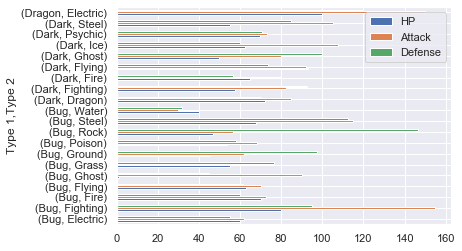

In [56]:
df5.plot(kind='barh')

Let's use a **lambda function** to compute a formula for each row that takes into account column-level statistics:

In [58]:
zscore = lambda x: (x - x.mean()) / x.std()
df5.apply(zscore)

HP    Attack   Defense
Type 1 Type 2                                
Bug    Electric -0.017866 -0.789752 -0.841476
       Fighting  0.956942  2.333057  0.595768
       Fire      0.469538 -0.437177 -0.661821
       Flying    0.128355 -0.516327 -0.605358
       Ghost    -2.893547  0.150448 -1.200787
       Grass    -0.261567 -0.392406 -0.062969
       Ground   -0.724601 -0.789752  0.685595
       Poison   -0.322493 -0.577088 -0.730689
       Rock     -0.667737 -0.968838  2.452208
       Steel     0.358131  0.980319  1.221995
       Water    -0.992673 -1.864267 -1.667892
Dark   Dragon    0.567019 -0.017445 -0.302510
       Fighting -0.139717 -0.101391  0.505940
       Fire      0.225836 -0.185338 -0.781591
       Flying    1.600314  0.224321 -0.165972
       Ghost    -0.505269 -0.185338  0.775423
       Ice       0.103985  0.738073 -0.661821
       Psychic   0.445168 -0.420388 -0.284544
       Steel    -0.261567  0.654127  0.236457
Dragon Electric  1.931749  2.165164  1.494045

# 6. Statistics with pandas & friends

`statsmodels` is a cool statistics library that also includes sample datasets for us to play with. Now *that's* accelerated learning!

<br />
<center>
<img src="ipynb.images/sunspots.jpg" width=400 />
</center>

In [59]:
import statsmodels.api as sm
data_loader = sm.datasets.sunspots.load_pandas()
df = data_loader.data
df.head()

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0


In [60]:
df.tail(10)

,YEAR,SUNACTIVITY
299,1999.0,93.3
300,2000.0,119.6
301,2001.0,111.0
302,2002.0,104.0
303,2003.0,63.7
304,2004.0,40.4
305,2005.0,29.8
306,2006.0,15.2
307,2007.0,7.5
308,2008.0,2.9


Wow, that's sunspots data, from the 18th century to.. 2008! in fact, [Galileo](https://en.wikipedia.org/wiki/Galileo_Galilei) first started documenting sunspots in the 1600s, using his newly invented telescope, and reliable sunspot observations begin in about 1700.

If you look closer at the dataset, you will find fractional years. When did fractional years start appearing? Take the modulo of each value with 1 to get the fractional part (lambda x: x % 1), using the `.apply()` API on the `df['SUNACTIVITY']` column. Then take the fractional part and mltiply by 1.2 to get months!

In [61]:
fractional_nums = df['SUNACTIVITY'].apply(lambda x: x % 1) #Take the modulo of each value with 1 to get the fractional part
fractional_nums[fractional_nums > 0].head(10)

49    0.9
50    0.4
51    0.7
52    0.8
53    0.7
54    0.2
55    0.6
56    0.2
57    0.4
58    0.6
Name: SUNACTIVITY, dtype: float64

Get a sense of the [distribution](https://en.wikipedia.org/wiki/Probability_distribution) of the values.

>**DEFINITION**: A **probability distribution** is a mathematical function that provides the probabilities of occurrence of different possible outcomes in an experiment. It is a description of a random phenomenon in terms of the probabilities of events. Random phenomena may not be as random as you think, as we will see this semester.

In [62]:
df['SUNACTIVITY'].describe()

count    309.000000
mean      49.752104
std       40.452595
min        0.000000
25%       16.000000
50%       40.000000
75%       69.800000
max      190.200000
Name: SUNACTIVITY, dtype: float64

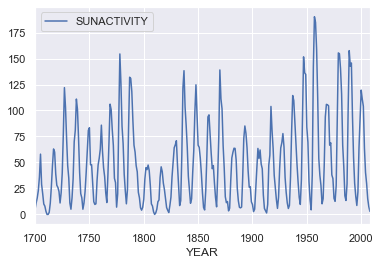

In [63]:
df.plot(x='YEAR', y='SUNACTIVITY', xlim=(1700,2008))

Looks like there's a **seasonality**! In other words, a cycle of sorts (increase --> decrease --> increase --> decrease --> etc.). What is its [period](https://en.wikipedia.org/wiki/Periodic_function) (or [frequency](https://en.wikipedia.org/wiki/Frequency))?

In [66]:
pd.tools.plotting.autocorrelation_plot(df['SUNACTIVITY'])

AttributeError: module 'pandas' has no attribute 'tools'

Autocorrelation clearly shows that there are two periods in the time series: A short one, and a longer one.

Let's find these periods using some... math magic. This is just to show off the power of math algorithms, which are all contained in one neat package called `SciPy`, and which we leverage with the help of a few otehr tools (`numpy`, `statsmodels`, `matplotlib`, ..).

We'll talk more at length about SciPy, the most beautiful of python libraries, in future notebooks.

<br />
<center>
<img src="ipynb.images/will-smith-aladin.jpg" width=600 />
Will Smith, a.k.a Alladin, masquerading as SciPy
</center>

In [69]:
print(df.shape)
N2 = df.shape[0] / 2
freqs = np.linspace(0, 0.5, num=N2, endpoint=False)[1:] #Nyquist range

(309, 2)


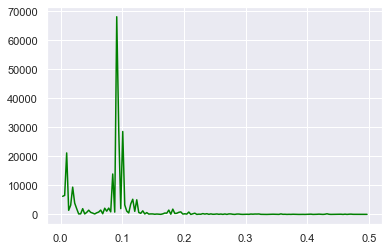

In [70]:
import scipy as sp
periodogram = sp.signal.lombscargle(df['YEAR'], df['SUNACTIVITY'], freqs * 2 * np.pi)
plt.plot(freqs, periodogram, color='green')

In [71]:
freq_index_at_max_power = np.argmax(periodogram)
print('Frequency and corresponding time in years at max power: %.2f, %.1f' % (freqs[freq_index_at_max_power], 1 / freqs[freq_index_at_max_power]))

Frequency and corresponding time in years at max power: 0.09, 11.0


So the major cycle is about 11 years, and the minor cycle at a just over a month.

Wow, **autocorrelation** is really cool. It allows us to find *repeating* **patterns** in data. In fact, it's an underlying paradigm in Machine Learning: 

>**Paradigm of Machine Learning**: Machine learning is function *approximation*. A *function* is a dimensionality reduction of *data*. ***Intelligence*** is how many functions you can build in your lifetime.

Can we find any correlations in our gaming data above (not neceassarily *auto*, but of one column against another)? It all starts with a *plot*:

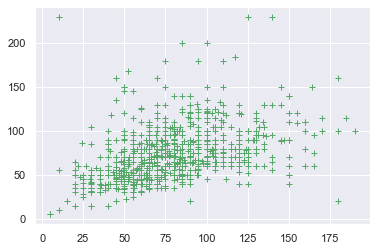

In [72]:
df = pd.read_csv('data/pokemon_data.csv')
attack = df['Attack']
defense = df['Defense']
plt.plot(attack, defense, 'g+')

How about for really good players?

In [73]:
df_g = df.loc[(df['Speed'] > 60) & (df['HP'] > 70)]
df_g.head(10)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
6,6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False
11,9,Blastoise,Water,NaN,79,83,100,85,105,78,1,False
12,9,BlastoiseMega Blastoise,Water,NaN,79,103,120,135,115,78,1,False
22,18,Pidgeot,Normal,Flying,83,80,75,70,70,101,1,False
23,18,PidgeotMega Pidgeot,Normal,Flying,83,80,80,135,80,121,1,False
33,28,Sandslash,Ground,NaN,75,100,110,45,55,65,1,False


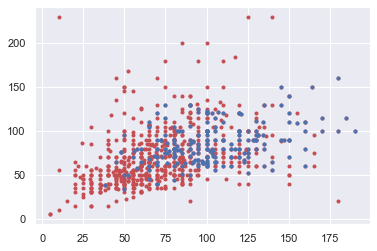

In [79]:
attack_g = df_g['Attack']
defense_g = df_g['Defense']
plt.plot(attack, defense, 'r.', label='all')
plt.plot(attack_g, defense_g, 'b.', label='good')

[Outliers](https://en.wikipedia.org/wiki/Outlier) can really ***skew*** our data. 

In statistics, an outlier is a data point that differs significantly from other observations. An outlier may be due to variability in the measurement or it may indicate experimental error.

We need a way to find out if there are outliers in our data, remove them, and then look again at our correlations!

Outliers are often taken to be any data points that are ***two standard deviations*** removed from the **mean**.

Let's look at outliers for different columns:

In [80]:
# make a copy of original df
newdf = df.copy()

newdf['x-Mean'] = abs(newdf['Attack'] - newdf['Attack'].mean())
newdf['1.96*std'] = 1.96*newdf['Attack'].std()  
newdf['Outlier'] = abs(newdf['Attack'] - newdf['Attack'].mean()) > 1.96*newdf['Attack'].std()
newdf.loc[(newdf['Outlier'] == True)]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,x-Mean,1.96*std,Outlier
19,15,BeedrillMega Beedrill,Bug,Poison,65,150,40,15,80,145,1,False,70.99875,63.616437,True
121,113,Chansey,Normal,NaN,250,5,5,35,105,50,1,False,74.00125,63.616437,True
137,127,PinsirMega Pinsir,Bug,Flying,65,155,120,65,90,105,1,False,75.99875,63.616437,True
139,129,Magikarp,Water,NaN,20,10,55,15,20,80,1,False,69.00125,63.616437,True
141,130,GyaradosMega Gyarados,Water,Dark,95,155,109,70,130,81,1,False,75.99875,63.616437,True
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,1,True,110.99875,63.616437,True
164,150,MewtwoMega Mewtwo Y,Psychic,NaN,106,150,70,194,120,140,1,True,70.99875,63.616437,True
229,212,ScizorMega Scizor,Bug,Steel,70,150,140,65,100,75,2,False,70.99875,63.616437,True
230,213,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False,69.00125,63.616437,True
232,214,HeracrossMega Heracross,Bug,Fighting,80,185,115,40,105,75,2,False,105.99875,63.616437,True


In [81]:
newdf.loc[(newdf['Outlier'] == False)]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,x-Mean,1.96*std,Outlier
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,30.00125,63.616437,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,17.00125,63.616437,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,2.99875,63.616437,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,20.99875,63.616437,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,27.00125,63.616437,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,717,Yveltal,Dark,Flying,126,131,95,131,98,99,6,True,51.99875,63.616437,False
794,718,Zygarde50% Forme,Dragon,Ground,108,100,121,81,95,95,6,True,20.99875,63.616437,False
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,20.99875,63.616437,False
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True,30.99875,63.616437,False


In [82]:
!pip install prettypandas

/bin/sh: pip: command not found


In [83]:
from prettypandas import PrettyPandas
PrettyPandas(newdf                                   # Prettyprints pandas dataframes
    .head(10)                                    # Sample the first 10 rows
    [[c for c in newdf.columns if "Sp." not in c]] # Ignore columns with "Sp." in the name (don't know what it means)
)

ModuleNotFoundError: No module named 'prettypandas'

In [84]:
PrettyPandas(newdf[newdf["Attack"]>=180])

NameError: name 'PrettyPandas' is not defined

In [85]:
# make a copy of original df
newdf2 = df.copy()

Attack = newdf.groupby('Attack')

newdf['Outlier'] = Attack.transform( lambda x: abs(x-x.mean()) > 1.96*x.std() )
newdf['x-Mean'] = Attack.transform( lambda x: abs(x-x.mean()) )
newdf['1.96*std'] = Attack.transform( lambda x: 1.96*x.std() )
newdf.loc[(newdf['Outlier'] == True)]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,x-Mean,1.96*std,Outlier
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,395.250000,393.312949,True
710,646,Kyurem,Dragon,Ice,125,130,90,130,90,95,5,True,382.428571,353.286912,True
732,664,Scatterbug,Bug,NaN,38,35,40,27,25,35,6,False,411.230769,377.883861,True
778,708,Phantump,Ghost,Grass,43,70,48,50,60,38,6,False,393.548387,376.686926,True
784,711,GourgeistAverage Size,Ghost,Grass,65,90,122,58,75,84,6,False,394.233333,374.068375,True
791,715,Noivern,Flying,Dragon,85,70,80,97,80,123,6,False,400.548387,376.686926,True


But Average and Standard Deviation are really only valid for [gaussian distributions](https://en.wikipedia.org/wiki/Normal_distribution) (also called *normal* distributions), as we will see later on in class..

In [86]:
# make a copy of original df
newdf3 = df.copy()

Attack = newdf3.groupby('Attack')

newdf3['Lower'] = Attack['Attack'].transform( lambda x: x.quantile(q=.25) - (1.5*(x.quantile(q=.75)-x.quantile(q=.25))) )
newdf3['Upper'] = Attack['Attack'].transform( lambda x: x.quantile(q=.75) + (1.5*(x.quantile(q=.75)-x.quantile(q=.25))) )
newdf3['Outlier'] = (newdf3['Attack'] < newdf3['Lower']) | (newdf3['Attack'] > newdf3['Upper']) 
newdf3.loc[(newdf3['Outlier'] == True)]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Lower,Upper,Outlier


### Histograms

[Histograms](https://en.wikipedia.org/wiki/Histogram) are essential to data science, because understanding *how* your data is distributed is **key** to being able to fit it to a **model**.

[Here](https://www.mathsisfun.com/data/quincunx.html) is how histograms are built.

>**DEFINITION**: A **model** for your data is a function that ***autoencodes your data*** (possibly as an [approximation](https://en.wikipedia.org/wiki/Approximation_theory)). In other words, it is able to learn all your data ***and*** be able to output your data by remembering a much smaller amount of data. That way, you ***keep your model and you can throw away the data***.

Your brain is, in fact, a ***model builder***. It learns all your past interactions between you and your parents, brother, husband, best friend, etc., and enables you to sidestep all future conflict (well, for some of us, our brain does *not* work that well ;-). How does it do that? Given the input of a potentially conflict-causing conditions, it is able to ***predict*** the future conflict, and thus devise strategies to avoid the conflict. *That* is why humans have conquered the planet. They are ***best*** at avoiding conflict.

What's your most basic example of a ***model***? We talked about this... Generators!

So, let's plot histograms. `seaborn` is the \#2 visualization library, after `matplotlib`, but it has a great histogram API. 

Text(0.5, 1.0, 'Defense')

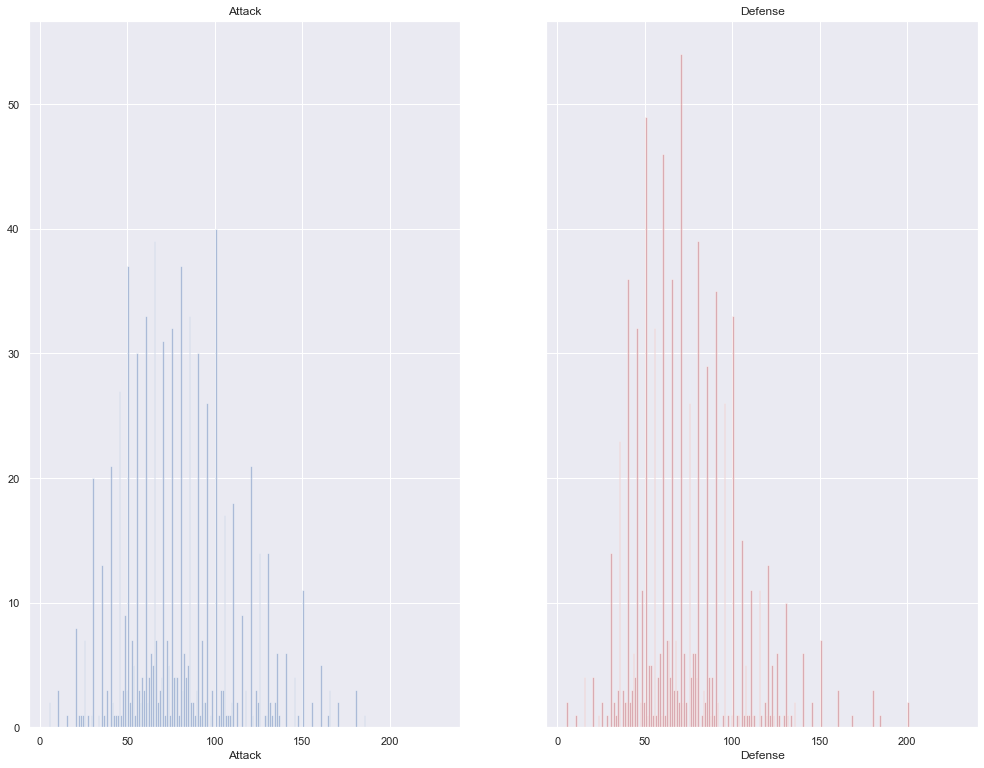

In [91]:
import seaborn as sns

fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(17,13),sharey=True,sharex=True)
sns.distplot(newdf3["Attack"], ax=ax1,
             bins=range(newdf3["Attack"].min(), newdf3["Attack"].max()),
             kde=False,
             color="b")
ax1.set_title("Attack")
sns.distplot(newdf3["Defense"], ax=ax2,
             bins=range(newdf3["Defense"].min(), newdf3["Defense"].max()),
             kde=False,
             color="r")
ax2.set_title("Defense")

We can even merge the two:

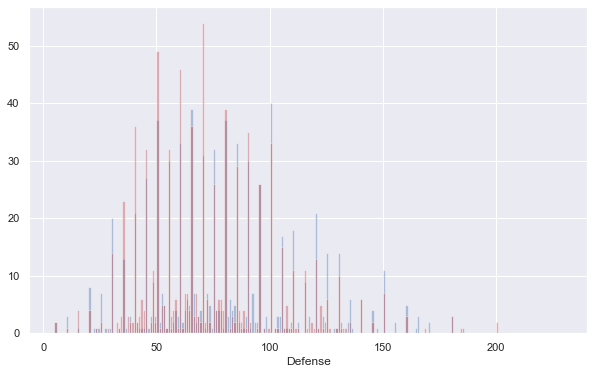

In [88]:
fig,ax1 = plt.subplots(nrows=1,figsize=(10,6),sharex=True)

sns.distplot(newdf3["Attack"], ax=ax1,
             bins=range(newdf3["Attack"].min(), newdf3["Attack"].max()),
             kde=False,
             color="b",
             label="Attack")
sns.distplot(newdf3["Defense"], ax=ax1,
             bins=range(newdf3["Defense"].min(), newdf3["Defense"].max()),
             kde=False,
             color="r",
             label="Defense")

# 7. Matrix visualizations with pandas & friends

`Clustergrammer` is the ***coolest*** web-based tool for visualizing high-dimensional data (e.g. a matrix) as an interactive and shareable hierarchically clustered heatmap. I think a plot is worth a thousand tables, and so I wanted to show you what the tool is.

Developed by the Ma'ayan lab at the Icahn School of Medicine In New York City. Clustergrammer's front end (Clustergrammer-JS) is built using [D3.js](https://d3js.org/) and its back-end (Clustergrammer-PY) is built using Python. Clustergrammer produces highly interactive visualizations that enable intuitive exploration of high-dimensional data and has several biology-specific features to facilitate the exploration of gene-level biological data.

Fernandez, N. F. et al. Clustergrammer, a web-based heatmap visualization and analysis tool for high-dimensional biological data. Sci. Data 4:170151 doi: [10.1038/sdata.2017.151 (2017)](https://www.nature.com/articles/sdata2017151).

In [92]:
!pip install clustergrammer_widget

/bin/sh: pip: command not found


In [ ]:
!jupyter nbextension enable --py --sys-prefix widgetsnbextension

In [ ]:
!jupyter nbextension enable --py --sys-prefix clustergrammer_widget

In [93]:
# import widget classes and instantiate Network instance
from clustergrammer_widget import *
net = Network(clustergrammer_widget)

In [94]:
# import widget classes and instantiate Network instance
from clustergrammer_widget import *
net = Network(clustergrammer_widget)

Let's create random data using `numpy`'s `random` API:

In [95]:
import numpy as np

# generate random matrix
num_rows = 10
num_cols = 10
np.random.seed(seed=100)
mat = np.random.rand(num_rows, num_cols)

# make row and col labels
rows = range(num_rows)
cols = range(num_cols)
rows = [str(i) for i in rows]
cols = [str(i) for i in cols]

# make pandas dataframe 
df6 = pd.DataFrame(data=mat, columns=cols, index=rows)
df6

,0,1,2,3,4,5,6,7,8,9
0,0.543405,0.278369,0.424518,0.844776,0.004719,0.121569,0.670749,0.825853,0.136707,0.575093
1,0.891322,0.209202,0.185328,0.108377,0.219697,0.978624,0.811683,0.171941,0.816225,0.274074
2,0.431704,0.940030,0.817649,0.336112,0.175410,0.372832,0.005689,0.252426,0.795663,0.015255
3,0.598843,0.603805,0.105148,0.381943,0.036476,0.890412,0.980921,0.059942,0.890546,0.576901
4,0.742480,0.630184,0.581842,0.020439,0.210027,0.544685,0.769115,0.250695,0.285896,0.852395
5,0.975006,0.884853,0.359508,0.598859,0.354796,0.340190,0.178081,0.237694,0.044862,0.505431
6,0.376252,0.592805,0.629942,0.142600,0.933841,0.946380,0.602297,0.387766,0.363188,0.204345
7,0.276765,0.246536,0.173608,0.966610,0.957013,0.597974,0.731301,0.340385,0.092056,0.463498
8,0.508699,0.088460,0.528035,0.992158,0.395036,0.335596,0.805451,0.754349,0.313066,0.634037
9,0.540405,0.296794,0.110788,0.312640,0.456979,0.658940,0.254258,0.641101,0.200124,0.657625


In [96]:
net.load_df(df6)
net.cluster(enrichrgram=False)
net.widget()

clustergrammer_widget(network='{"row_nodes": [{"name": "0", "ini": 10, "clust": 3, "rank": 2, "rankvar": 5, "g…

Let's load real data.

In [97]:
# load matrix file
net.load_file('data/rc_two_cats.txt')

# cluster using default parameters
net.cluster(enrichrgram=True)

# make interactive widget
net.widget()

FileNotFoundError: [Errno 2] No such file or directory: 'data/rc_two_cats.txt'

# 8. Machine Learning with pandas & friends

Here we show an example of how well `Scikit-learn` and `pandas` integrate to do Machine Learning (`Scikit-learn`) from data (`pandas`). Don't worry about the algorithm yet ([random forest](https://en.wikipedia.org/wiki/Random_forest)), or Machine Learning (ML) in general. We'll study all this  in class. 

<br />
<center>
    <img src="images/pretty-forest.jpeg" width=600 />
</center>

But random forests are so cool. In opinion, the most generally successful algorithm in ML. Invented in the 1950s (as a **decision tree** algorithm) and optimized using [ensembling](https://en.wikipedia.org/wiki/Ensemble_learning) in modern libraries like `Scikit-Learn`. Just be amazed ;-)

<br />
<center>
    <img src="images/minions-amazed.jpg" width=300 />
</center>

We read in meterological data as a `pandas` dataframe:

In [3]:
import pandas as pd
import numpy as np
nyc = pd.read_csv('data/central-park-raw.csv', parse_dates=[0])

Let's peek at our data..

In [4]:
nyc.head()

,EST,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
0,2006-01-01,42.0,37.0,32.0,32.0,30.0,28.0,85.0,74.0,62.0,...,10.0,10.0,8.0,9.0,3.0,10.0,0.00,8.0,NaN,276.0
1,2006-01-02,48.0,44.0,39.0,38.0,34.0,29.0,92.0,71.0,49.0,...,10.0,8.0,4.0,18.0,5.0,24.0,0.63,5.0,Rain,76.0
2,2006-01-03,40.0,37.0,33.0,38.0,33.0,26.0,92.0,84.0,75.0,...,10.0,7.0,2.0,28.0,15.0,41.0,1.13,8.0,Rain,39.0
3,2006-01-04,38.0,34.0,29.0,36.0,26.0,19.0,85.0,72.0,59.0,...,10.0,10.0,4.0,15.0,7.0,20.0,0.00,3.0,NaN,70.0
4,2006-01-05,50.0,44.0,37.0,38.0,35.0,32.0,92.0,71.0,50.0,...,10.0,6.0,2.0,15.0,5.0,21.0,0.05,6.0,Rain,251.0


After a bit of EDA, we decide to do some data *healing* and preprocessing:

In [5]:
### Data transformations
nyc.columns = [x.strip() for x in nyc.columns]
nyc.columns = [x.replace(' ', '_') for x in nyc.columns]
nyc.PrecipitationIn.replace("T", '0.001')
nyc.PrecipitationIn = pd.to_numeric(nyc.PrecipitationIn.replace("T", '0.001'))
nyc['Events'] = nyc.Events.fillna('')

`pandas` gives us easy integration with the `sklearn` library. 

Let's see if we can predict humidity (y) from the other columns (X).

Any column we want to *predict* is a ***y*** (*dependent* variable). The coluumns that help us predict it are ***x***'s (*independent* variables). And I use a capital ***X*** to denote that there are many such columns.

We will train a Random Forest with a sample of our data, then test it with another sample to see how it performs. Let's import the `Scikit-learn` modules.

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split

Let's look at the attributes (columns) of our dataset.

In [1]:
 nyc.columns

NameError: name 'nyc' is not defined

Let's see if we can make mean **humidity** the *dependent variable*, and predict it using other columns as *independent variables*. 

Let's look at mean humidity and also shift mean humidity shifted by one row ***up***, so that we may use information from the **previous day** to predict the ***next day***'s mean humidity value (isn't that what meteorologists try to do?). Indeed, each row in our spreadsheet represents meteorological data for ***one day***.

`pandas` has a very neat API to do this. This is what a row-up-shifted column looks like:

In [8]:
 # Shift Humidity down to predict next day
pd.concat([nyc.Mean_Humidity, nyc.Mean_Humidity.shift(-1)], axis=1)

,Mean_Humidity,Mean_Humidity
0,74.0,71.0
1,71.0,84.0
2,84.0,72.0
3,72.0,71.0
4,71.0,60.0
...,...,...
3282,47.0,73.0
3283,73.0,42.0
3284,42.0,47.0
3285,47.0,43.0


Now we can use the up-shifted column as training data and test data!

Notice that the `Events` column is **categorical** (a set of different string values), so we need to turn it into **numbers**. Pandas has a great API for this: `get_dummies()`.

In [9]:
# Need to make "Dummy" variables from Events column
nyc_dummy = pd.get_dummies(nyc, columns=['Events'])
nyc_dummy.head()

,EST,Max_TemperatureF,Mean_TemperatureF,Min_TemperatureF,Max_Dew_PointF,MeanDew_PointF,Min_DewpointF,Max_Humidity,Mean_Humidity,Min_Humidity,...,WindDirDegrees,Events_,Events_Fog,Events_Fog-Rain,Events_Fog-Rain-Snow,Events_Fog-Snow,Events_Rain,Events_Rain-Snow,Events_Snow,Events_Thunderstorm
0,2006-01-01,42.0,37.0,32.0,32.0,30.0,28.0,85.0,74.0,62.0,...,276.0,1,0,0,0,0,0,0,0,0
1,2006-01-02,48.0,44.0,39.0,38.0,34.0,29.0,92.0,71.0,49.0,...,76.0,0,0,0,0,0,1,0,0,0
2,2006-01-03,40.0,37.0,33.0,38.0,33.0,26.0,92.0,84.0,75.0,...,39.0,0,0,0,0,0,1,0,0,0
3,2006-01-04,38.0,34.0,29.0,36.0,26.0,19.0,85.0,72.0,59.0,...,70.0,1,0,0,0,0,0,0,0,0
4,2006-01-05,50.0,44.0,37.0,38.0,35.0,32.0,92.0,71.0,50.0,...,251.0,0,0,0,0,0,1,0,0,0


In [10]:
nyc_dummy.columns

Index(['EST', 'Max_TemperatureF', 'Mean_TemperatureF', 'Min_TemperatureF',
       'Max_Dew_PointF', 'MeanDew_PointF', 'Min_DewpointF', 'Max_Humidity',
       'Mean_Humidity', 'Min_Humidity', 'Max_Sea_Level_PressureIn',
       'Mean_Sea_Level_PressureIn', 'Min_Sea_Level_PressureIn',
       'Max_VisibilityMiles', 'Mean_VisibilityMiles', 'Min_VisibilityMiles',
       'Max_Wind_SpeedMPH', 'Mean_Wind_SpeedMPH', 'Max_Gust_SpeedMPH',
       'PrecipitationIn', 'CloudCover', 'WindDirDegrees', 'Events_',
       'Events_Fog', 'Events_Fog-Rain', 'Events_Fog-Rain-Snow',
       'Events_Fog-Snow', 'Events_Rain', 'Events_Rain-Snow', 'Events_Snow',
       'Events_Thunderstorm'],
      dtype='object')

Let's create our **training** *independent variables* (X_train) and **test** *independent variables* (X_test), and our **training* *dependent variable* (y_train) and **test** *dependent variable* (y_test). Notice how I use an uppercase X to denote that X is multi-dimensional, while I use a lowercase y to denote that y is one-dimensional.

We need to remove the timestamp from the training data, as it is not relevant to our model. Each different timestamped row is just another ***observation***. We also need to disregard the `Events_` column. Where did that come from?

We also need to drop `N/A`s from all cells.

All that is called **EDA**.

In [2]:
# Need to remove NA
# Regression - Try to predict Mean_Humidity (y) from non humidity columns (X)
# Get training set (X_train)
def valid(col):
    return 'Humid' not in col and 'EST' not in col and col != 'Events_'
nyc_dummy = nyc_dummy.dropna()
X = nyc_dummy[[x for x in nyc_dummy.columns if valid(x)]].iloc[:-1]
y = nyc_dummy.Mean_Humidity.shift(-1).dropna()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

NameError: name 'nyc_dummy' is not defined

In [17]:
len(X_train)/len(X_test)

2.996221662468514

In [12]:
X.head()

,Max_TemperatureF,Mean_TemperatureF,Min_TemperatureF,Max_Dew_PointF,MeanDew_PointF,Min_DewpointF,Max_Sea_Level_PressureIn,Mean_Sea_Level_PressureIn,Min_Sea_Level_PressureIn,Max_VisibilityMiles,...,CloudCover,WindDirDegrees,Events_Fog,Events_Fog-Rain,Events_Fog-Rain-Snow,Events_Fog-Snow,Events_Rain,Events_Rain-Snow,Events_Snow,Events_Thunderstorm
1,48.0,44.0,39.0,38.0,34.0,29.0,30.24,30.15,29.93,10.0,...,5.0,76.0,0,0,0,0,1,0,0,0
2,40.0,37.0,33.0,38.0,33.0,26.0,30.05,29.93,29.83,10.0,...,8.0,39.0,0,0,0,0,1,0,0,0
3,38.0,34.0,29.0,36.0,26.0,19.0,30.09,29.96,29.79,10.0,...,3.0,70.0,0,0,0,0,0,0,0,0
4,50.0,44.0,37.0,38.0,35.0,32.0,29.81,29.71,29.63,10.0,...,6.0,251.0,0,0,0,0,1,0,0,0
5,43.0,37.0,30.0,33.0,24.0,14.0,29.82,29.72,29.67,10.0,...,7.0,317.0,0,0,0,0,0,0,0,0


In [13]:
np.sum(X['Events_Fog-Rain'])

182

In [14]:
X.T

,1,2,3,4,5,6,7,8,9,10,...,3277,3278,3279,3280,3281,3282,3283,3284,3285,3286
Max_TemperatureF,48.00,40.00,38.00,50.00,43.00,35.00,46.00,60.00,49.00,52.00,...,44.00,46.00,58.00,62.00,50.00,55.00,54.00,44.00,34.00,32.00
Mean_TemperatureF,44.00,37.00,34.00,44.00,37.00,30.00,40.00,52.00,45.00,47.00,...,40.00,45.00,51.00,53.00,45.00,50.00,49.00,39.00,31.00,30.00
Min_TemperatureF,39.00,33.00,29.00,37.00,30.00,25.00,34.00,43.00,41.00,42.00,...,35.00,43.00,44.00,44.00,40.00,44.00,43.00,34.00,28.00,27.00
Max_Dew_PointF,38.00,38.00,36.00,38.00,33.00,19.00,35.00,39.00,31.00,50.00,...,42.00,44.00,57.00,60.00,29.00,35.00,43.00,25.00,17.00,12.00
MeanDew_PointF,34.00,33.00,26.00,35.00,24.00,14.00,25.00,36.00,28.00,42.00,...,35.00,42.00,47.00,40.00,28.00,31.00,37.00,19.00,13.00,8.00
Min_DewpointF,29.00,26.00,19.00,32.00,14.00,11.00,19.00,30.00,26.00,30.00,...,29.00,41.00,43.00,27.00,27.00,29.00,26.00,15.00,8.00,5.00
Max_Sea_Level_PressureIn,30.24,30.05,30.09,29.81,29.82,29.99,30.10,30.25,30.50,30.40,...,30.35,30.18,30.08,30.12,30.25,30.27,30.07,30.26,30.40,30.35
Mean_Sea_Level_PressureIn,30.15,29.93,29.96,29.71,29.72,29.93,30.04,30.01,30.42,30.09,...,30.27,30.12,29.79,29.74,30.20,30.19,29.95,30.18,30.36,30.28
Min_Sea_Level_PressureIn,29.93,29.83,29.79,29.63,29.67,29.84,29.95,29.92,30.28,29.87,...,30.16,30.07,29.53,29.48,30.13,30.07,29.88,30.09,30.27,30.18
Max_VisibilityMiles,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,...,10.00,9.00,7.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00


Now we create a ML model, using `RandomForestRegressor` from the `sk-learn` package. Do not worry if you don't understand how this is done. You will soon enough! 

That's *one* line of code in `Scikit-learn`.

Then, we fit the model to the training data (that's the ***training step***). That is where we fit a **curve** to the **datapoints**. This is where we do function approximation. We try to find the function that fits through our data.


That's *another* line of code in `Scikit-learn`.

Here are your two lines of code that do *everything*:

In [15]:
# Create a model 
rf_model = RandomForestRegressor()

# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Let's score our model at how good it is in predicting tomorrow's mean humidity from today's weather variables (all those that *do not* relate to humidity)

In [31]:
# Get R2 measure (indicator of accuracy 1 is perfect 0 is horrible)
rf_model.score(X_test, y_test)

0.8838223384520193

Not bad, close to 90%!

In [32]:
type(y_test)

pandas.core.series.Series

In [33]:
pd.concat([pd.Series(rf_model.predict(X_test)), y_test.reset_index(
drop=True)], axis=1)

,0,Mean_Humidity
0,66.7,73.0
1,57.8,62.0
2,50.8,58.0
3,43.1,47.0
4,62.9,61.0
...,...,...
789,63.3,63.0
790,79.9,80.0
791,88.1,94.0
792,53.9,55.0


What are the most important features in predicting mean humidity for tomorrow?

In [113]:
sorted(zip(X.columns, rf_model.feature_importances_),
        key=lambda x: x[1], reverse=True)

[('Min_VisibilityMiles', 0.29901226092423067),
 ('Mean_VisibilityMiles', 0.20688932157228335),
 ('Min_DewpointF', 0.1552178565897777),
 ('CloudCover', 0.11113767856289425),
 ('MeanDew_PointF', 0.06613727924003564),
 ('Max_TemperatureF', 0.04977200266930342),
 ('Mean_TemperatureF', 0.025180930351289266),
 ('WindDirDegrees', 0.01526420827537247),
 ('Max_Dew_PointF', 0.014656610781964797),
 ('Min_TemperatureF', 0.013647957565376699),
 ('PrecipitationIn', 0.008206612999053228),
 ('Max_Gust_SpeedMPH', 0.006786783889937031),
 ('Min_Sea_Level_PressureIn', 0.005942223895634555),
 ('Max_Sea_Level_PressureIn', 0.005544149309398594),
 ('Mean_Sea_Level_PressureIn', 0.00538602817506612),
 ('Mean_Wind_SpeedMPH', 0.0050970559166281055),
 ('Max_Wind_SpeedMPH', 0.004569949140285164),
 ('Events_Rain', 0.0004683851409755681),
 ('Max_VisibilityMiles', 0.00044027166167124763),
 ('Events_Snow', 0.00019292769421581777),
 ('Events_Fog-Snow', 0.00017155491933388447),
 ('Events_Fog-Rain', 0.0001556851645613075)

## Homework

Due next week, teams of two. *Must be* different team than from last homework.

<br />
<center>
<img src="images/will-smith-aladin-2.jpg" width=400 />
    different :-)
</center>

You are already looking at financial time series as homework. See *how far* into the future you can predict stock prices for your three chosen stocks, using a random forest from `Scikit-learn`. Assume you want a prediction score above 70%. Then, start investing, and become..

<br />
<center>
<img src="ipynb.images/wolf-wall-street.jpg" width=400 />
</center>